# **MNIST data set classsification**

In [2]:
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain, xtest = xtrain/255.0, xtest/255.0
print("xtrain shape:", xtrain.shape)


11490434/11490434 [==============================] - 0s 0us/step
xtrain shape: (60000, 28, 28)


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [12]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [13]:
r = model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2933 - accuracy: 0.9153 - val_loss: 0.1386 - val_accuracy: 0.9576
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1432 - accuracy: 0.9577 - val_loss: 0.1049 - val_accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1083 - accuracy: 0.9671 - val_loss: 0.0930 - val_accuracy: 0.9701
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0869 - accuracy: 0.9737 - val_loss: 0.0793 - val_accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0747 - accuracy: 0.9764 - val_loss: 0.0755 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0658 - accuracy: 0.9792 - val_loss: 0.0758 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0585 - accuracy: 0.9809 - val_loss: 0.0732 - val_accurac

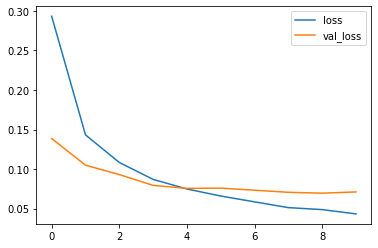

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

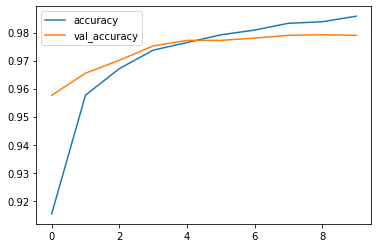

In [15]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [16]:
print(model.evaluate(xtest, ytest))

313/313 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9790
[0.07099439948797226, 0.9789999723434448]


313/313 [==============================] - 1s 2ms/step
Confusion confusion matrix, w/o normalization
[[ 971    0    2    2    1    0    1    1    2    0]
 [   0 1125    3    1    0    1    2    1    2    0]
 [   3    0 1010    5    3    0    1    5    5    0]
 [   0    0    4  994    0    3    0    3    2    4]
 [   2    0    2    1  958    0    4    4    2    9]
 [   2    0    0   13    0  867    3    1    3    3]
 [   5    3    1    1    6    4  932    0    6    0]
 [   0    2    9    5    0    0    0 1008    3    1]
 [   6    1    4    3    2    3    2    5  946    2]
 [   3    3    0    5    8    1    0    9    1  979]]


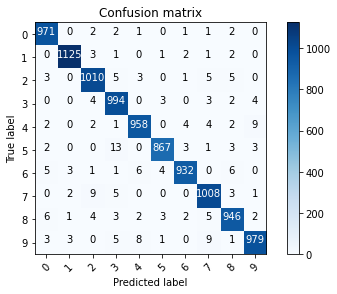

In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion confusion matrix, w/o normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.0
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

ptest = model.predict(xtest).argmax(axis=1)
cm = confusion_matrix(ytest, ptest)
plot_confusion_matrix(cm, list(range(10)))

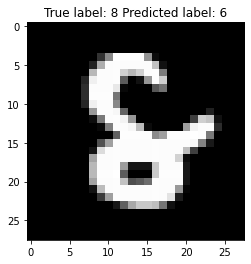

In [35]:
misclassified_idx = np.where(ptest != ytest)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(xtest[i], cmap = 'gray')
plt.title("True label: %s Predicted label: %s" % (ytest[i], ptest[i]));